# VirES - access to non-Swarm multi-mission magnetic data

This notebook demonstrates access to CryoSat-2, GRACE A/B, GRACE-FO, CSES, ePOP LR and HR magnetic products avaiable from the DISC VirES server.

In [1]:
# pre-release setup

! pip install --upgrade 'git+https://github.com/ESA-VirES/VirES-Python-Client@multi-mission-demo#egg=viresclient'


  Cloning https://github.com/ESA-VirES/VirES-Python-Client (to revision multi-mission-demo) to /tmp/pip-install-tuw5q0pe/viresclient
  Created wheel for viresclient: filename=viresclient-0.8.0a0-py3-none-any.whl size=71071 sha256=90b300e290b4bfb0b6c7604c23992840044b4b599e02a6eaf15f6f6bc9271c1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-r9vrh_pk/wheels/32/c0/7b/9a56c7193e4ade4e4e70b5f8ed5d450e2ecd4e3d03eef4e64d
Successfully built viresclient
  Attempting uninstall: viresclient
    Found existing installation: viresclient 0.8.0a0
    Uninstalling viresclient-0.8.0a0:
      Successfully uninstalled viresclient-0.8.0a0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
from viresclient import SwarmRequest

#SERVER_URL = None # default VirES server
SERVER_URL = 'https://staging.viresdisc.vires.services/ows' # DISC server

In [3]:
from matplotlib.pyplot import subplot, figure

class AttrDict(dict):
    def __getattr__(self, key):
        return self[key]

VECTORS = AttrDict({
    "B_NEC_CHAOS": ["B_N_CHAOS", "B_E_CHAOS", "B_C_CHAOS"],
    "B_NEC": ["B_N", "B_E", "B_C"],
    "B_NEC1": ["B_N1", "B_E1", "B_C1"],
    "B_NEC2": ["B_N2", "B_E2", "B_C2"],
    "B_NEC3": ["B_N3", "B_E3", "B_C3"],
})

def plot_magnetic_data(data, product_type):
    
    def _extract_variables(variables):
        return AttrDict({
            variable: data[variable].values
            for variable in variables if variable in data
        })
    
    def _plot(ax, x, y, title, xlabel, ylabel, **opts):
        ax.plot(x, y, '.', **opts)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_ylim([-250, 250])
        ax.set_xlim([-90, 90])
        ax.set_xticks([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
        ax.grid()
        return ax
        
    coords = _extract_variables(['Timestamp', 'Latitude', 'Longitude', 'Radius', 'QDLat', 'MLT'])
    models = _extract_variables(['F_CHAOS', 'B_NEC_CHAOS'])
    f_variables = _extract_variables(["F"])
    b_variables = _extract_variables(["B_NEC", "B_NEC1", "B_NEC2", "B_NEC3"])
    
    for variable, values in f_variables.items():
        delta = values - models.F_CHAOS
        
        #fig = figure()
        fig = figure(figsize=(18, 2), dpi=100)
        _plot(
            subplot(1, 1, 1),
            coords.QDLat, delta, ms=2,
            title=f'{product_type} - {variable}',
            ylabel=f"{variable} - F_CHAOS / nT",
            xlabel="QD-latitude / deg.",
        )


    for vvariable, values in b_variables.items():
        delta = values - models.B_NEC_CHAOS
        
        for idx, cvariable in enumerate(VECTORS[vvariable]):
        
            fig = figure(figsize=(18, 2), dpi=100)
            ax = subplot(1, 1, 1)
            _plot(
                ax, coords.QDLat, delta[:, idx], ms=2,
                title=f'{product_type} - {vvariable}',
                ylabel=f"{cvariable} - {VECTORS.B_NEC_CHAOS[idx]} / nT",
                xlabel="QD-latitude / deg.",
            )

# CSES Data

avaiable data: 2019-01-01/2019-01-31

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:10, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (1.539MB)


<xarray.Dataset>
Dimensions:      (B_FGM1_dim1: 3, B_FGM2_dim1: 3, NEC: 3, Timestamp: 6924, quaternion: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2019-01-01T00:10:15.410992146 ... 2019-01-01T23:59:56.265000105
  * NEC          (NEC) <U1 'N' 'E' 'C'
  * quaternion   (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_FGM1_dim1, B_FGM2_dim1
Data variables:
    Spacecraft   (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Flag_TBB     (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    B_FGM1       (Timestamp, B_FGM1_dim1) float64 1.165e+04 ... -2.153e+04
    B_NEC_CHAOS  (Timestamp, NEC) float64 8.643e+03 -1.087e+04 ... -2.159e+04
    B_NEC1       (Timestamp, NEC) float64 8.632e+03 -1.095e+04 ... -2.158e+04
    Flag_SHW     (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 1 1 1 1 1 1
    q_NEC_CRF    (Timestamp, quaternion) float64 1.634e-05 0.0006313 ... 0.9971
    Flag_MT      (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 0 

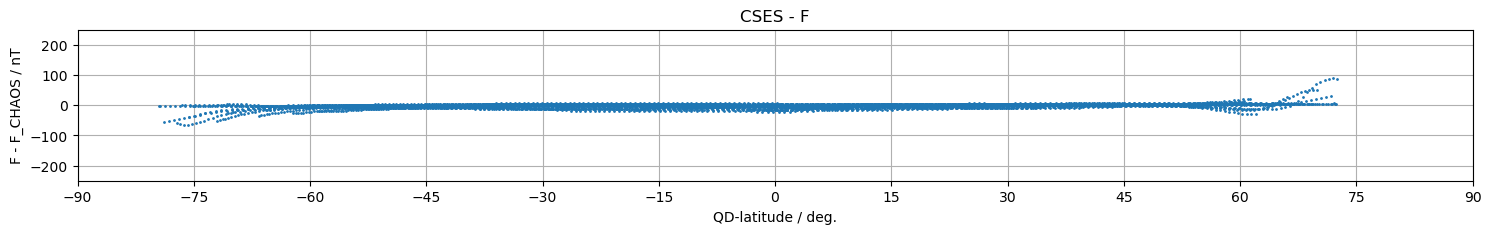

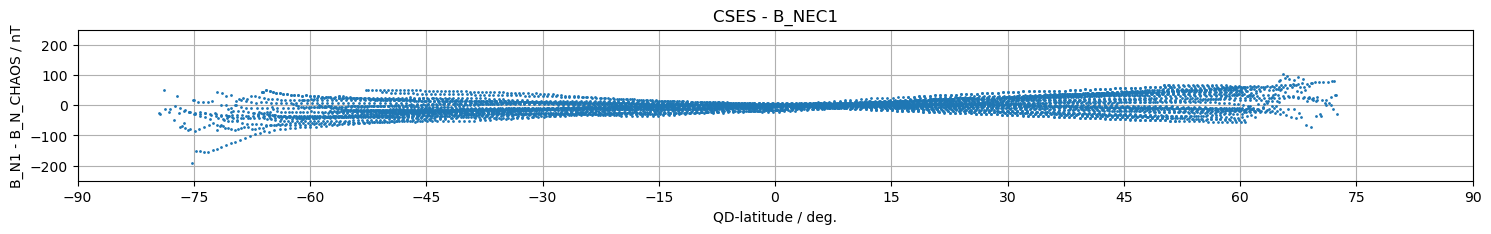

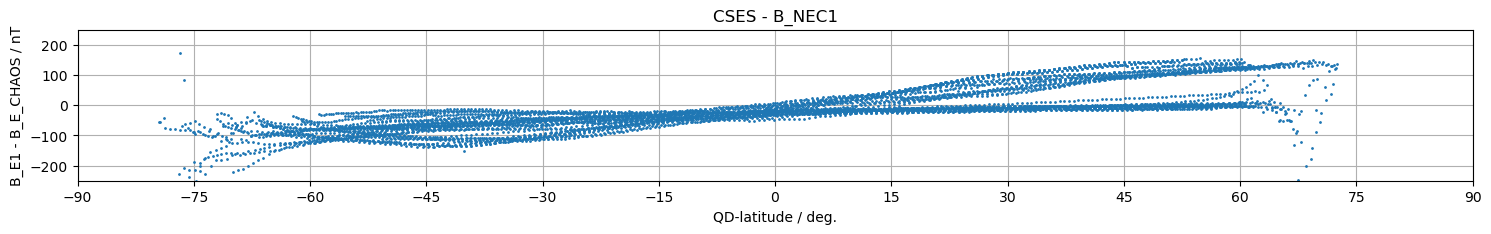

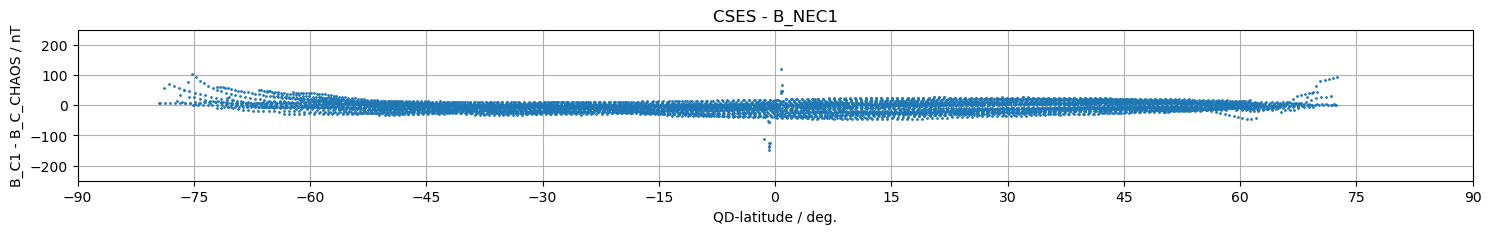

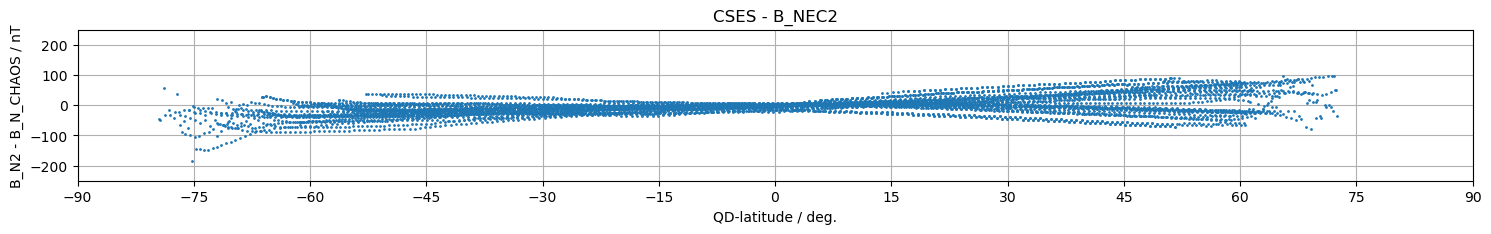

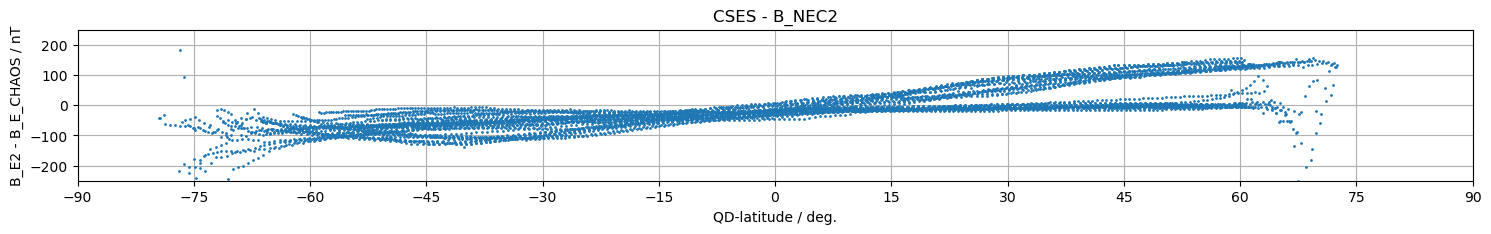

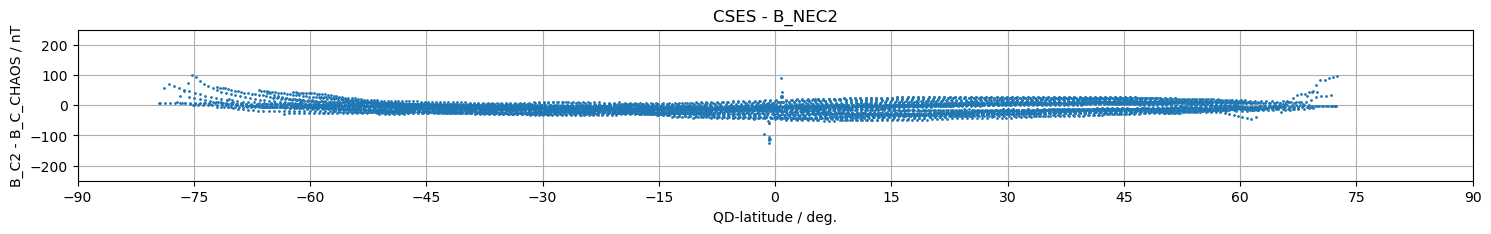

In [4]:
SwarmRequest.COLLECTIONS["MAG_CSES"] = ["CSES_01_MAG"]

SwarmRequest.PRODUCT_VARIABLES["MAG_CSES"] = [
    "F", "B_NEC1","B_NEC2", "B_FGM1", "B_FGM2",
    "q_NEC_CRF", "Flag_TBB", "Flag_MT", "Flag_SHW",
]

request = SwarmRequest(SERVER_URL)
request.set_collection("CSES_01_MAG")
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_CSES"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'CSES')

## CryoSat-2 Data

avaiable data: 2016-01-01/2016-01-31 and 2018-07-01/2018-07-31

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:12, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (2.785MB)


<xarray.Dataset>
Dimensions:      (B_FGM1_dim1: 3, B_FGM2_dim1: 3, B_FGM3_dim1: 3, B_mod_NEC_dim1: 3, NEC: 3, Timestamp: 8640, quaternion: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2016-01-01T00:00:05.272000074 ... 2016-01-01T23:59:57.286000013
  * NEC          (NEC) <U1 'N' 'E' 'C'
  * quaternion   (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_FGM1_dim1, B_FGM2_dim1, B_FGM3_dim1, B_mod_NEC_dim1
Data variables:
    Spacecraft   (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    q_NEC_CRF    (Timestamp, quaternion) float64 0.05727 -0.9984 ... 0.001254
    Latitude     (Timestamp) float64 -58.84 -59.56 -60.04 ... 61.57 62.06 62.78
    B_NEC        (Timestamp, NEC) float64 nan nan nan 3.499e+03 ... nan nan nan
    B_mod_NEC    (Timestamp, B_mod_NEC_dim1) float64 4.117e+03 ... 3.767e+04
    B_FGM1       (Timestamp, B_FGM1_dim1) float64 -3.198e+03 ... -3.373e+04
    B_NEC_CHAOS  (Timestamp, NEC) float64 4.12e+03 2.974e+03 ... 3.767e+04


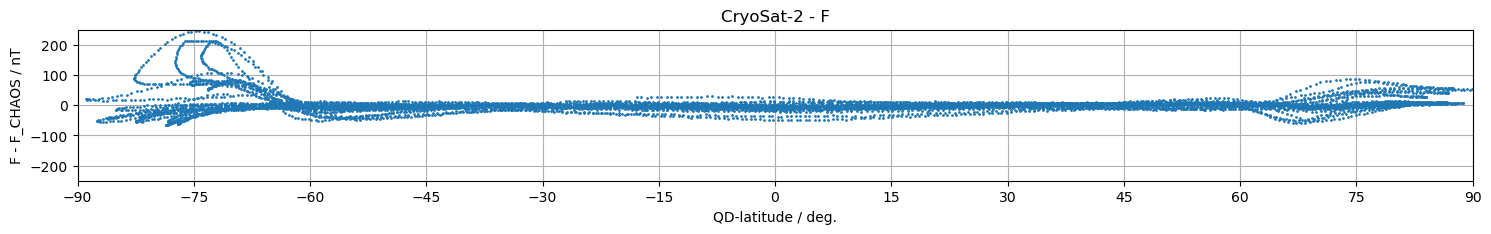

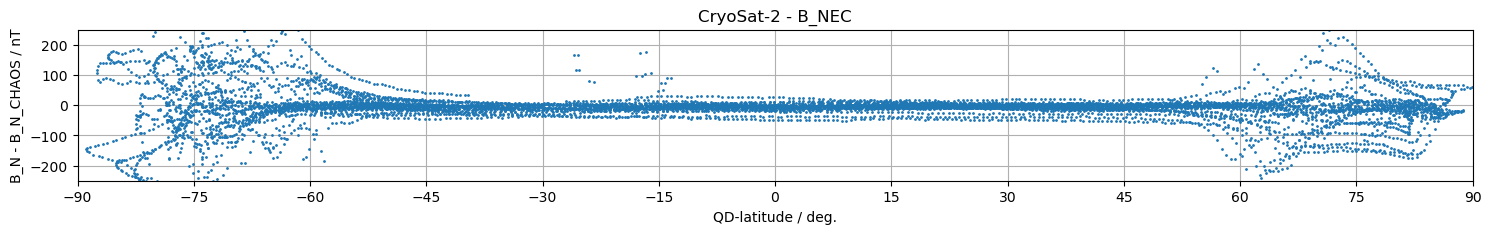

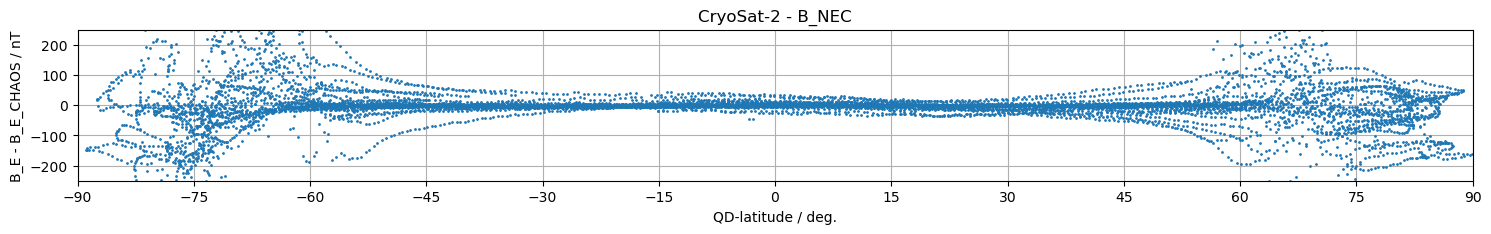

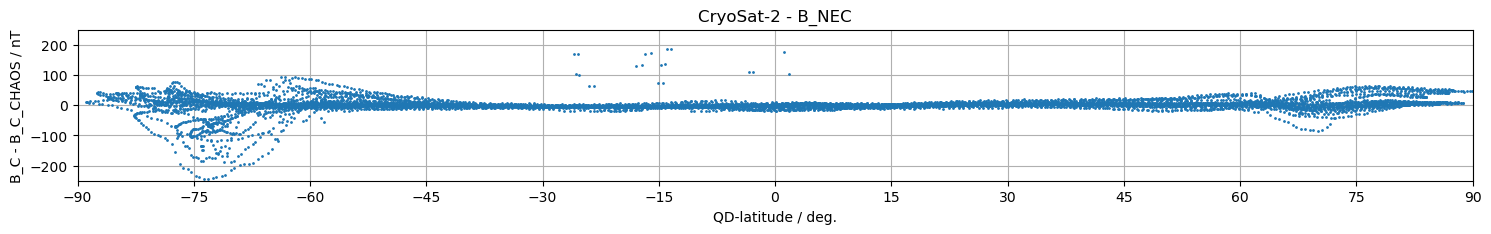

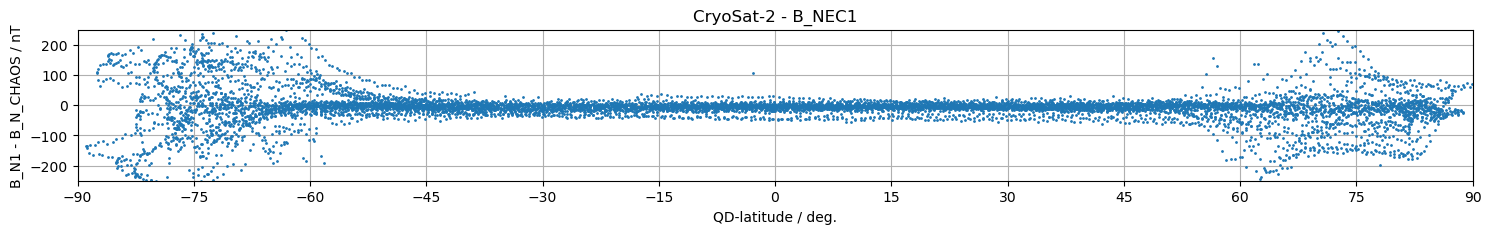

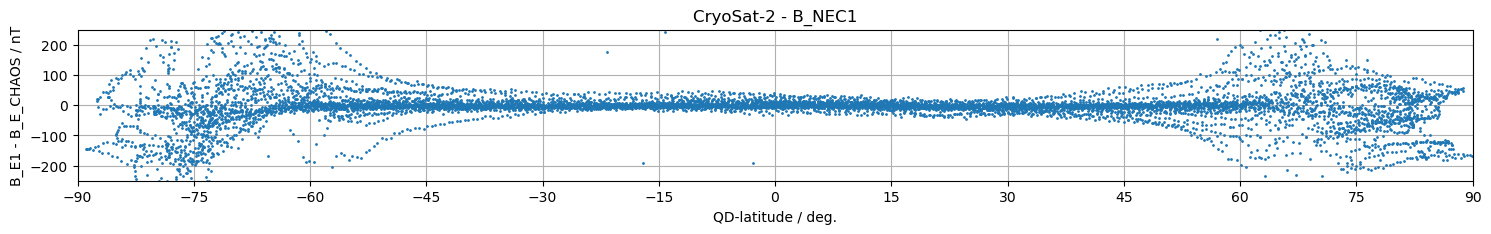

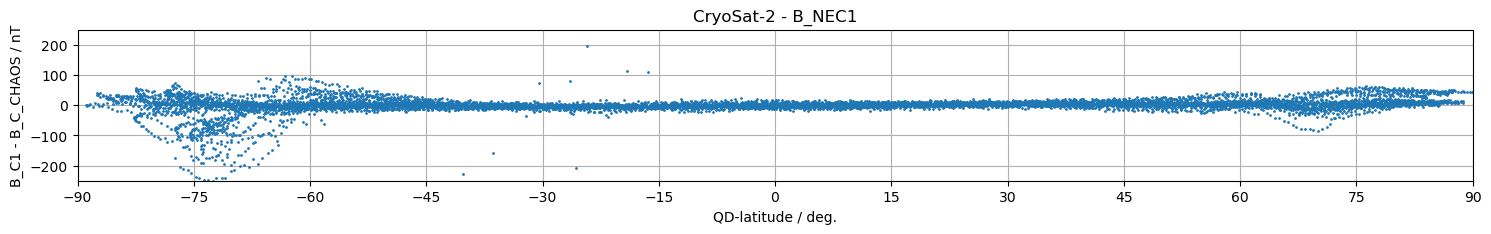

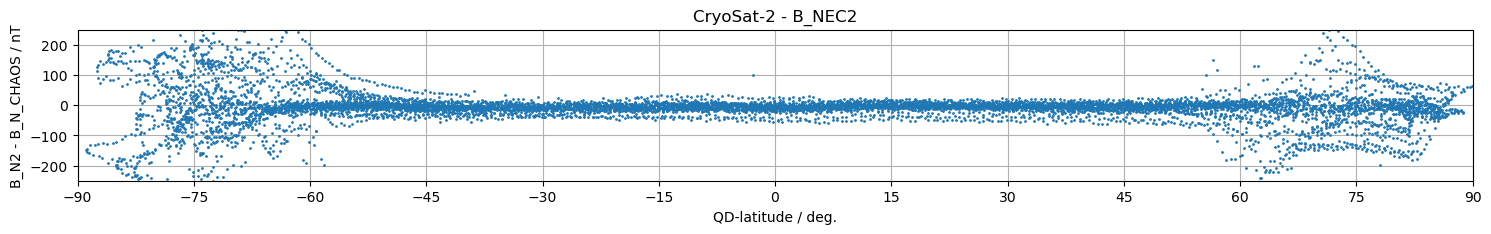

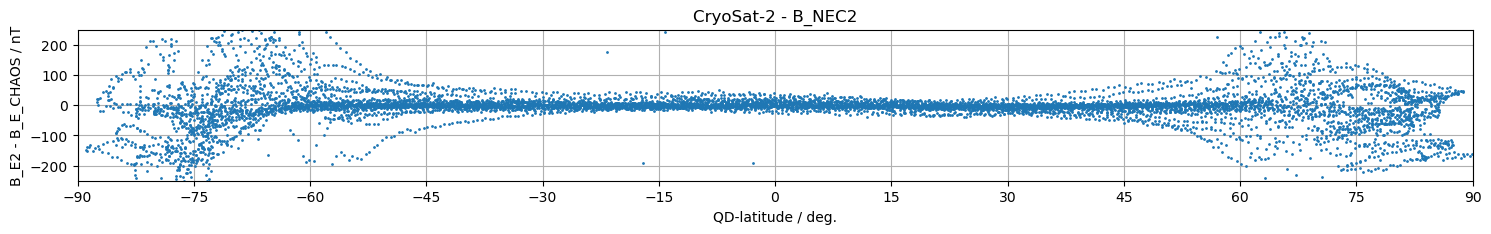

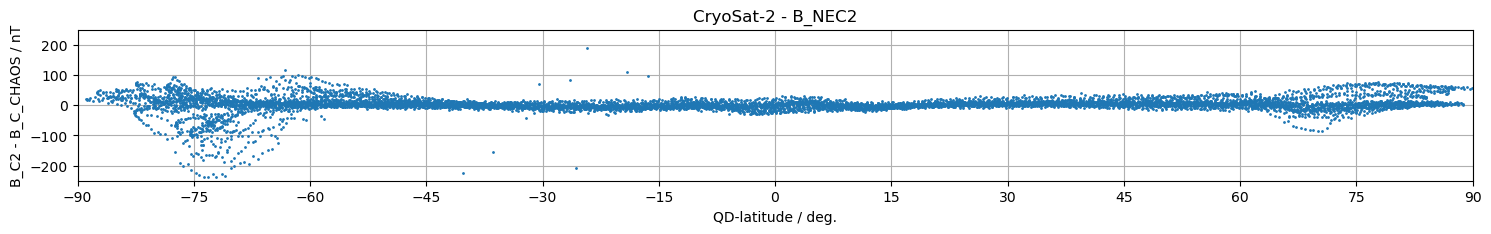

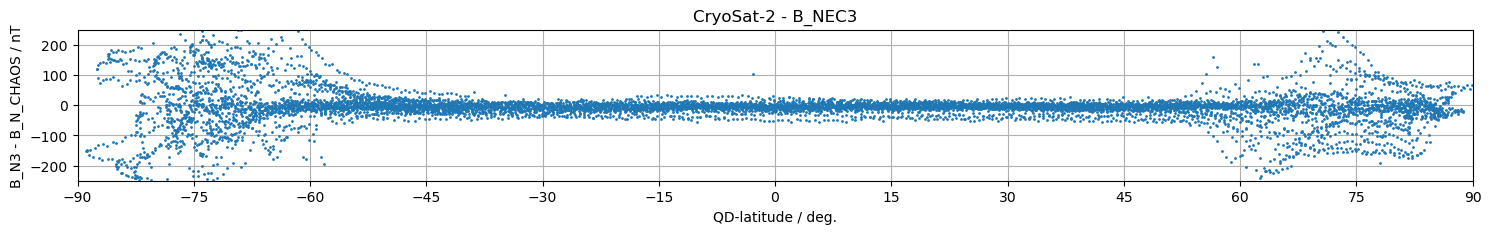

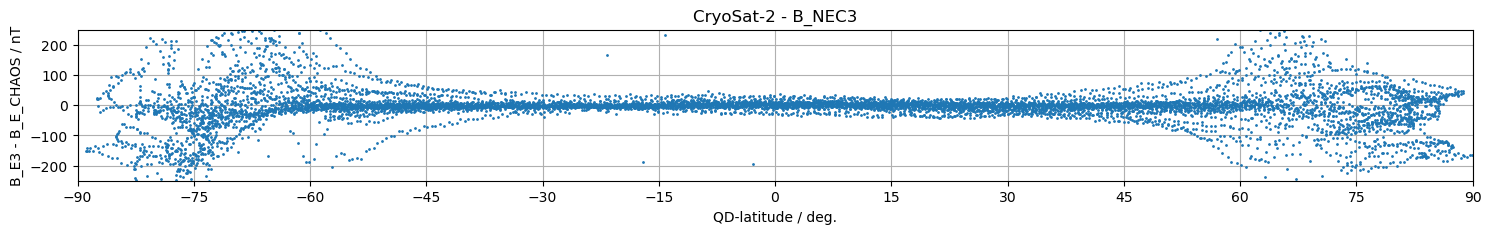

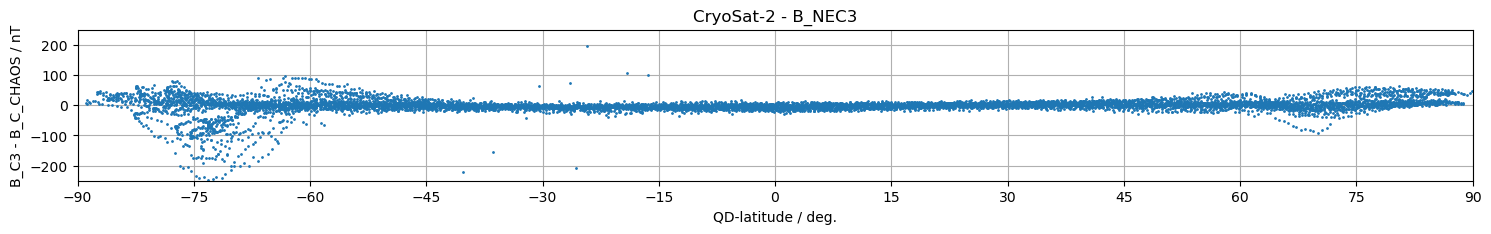

In [5]:
SwarmRequest.COLLECTIONS["MAG_CS2"] = ["CS_OPER_MAG"]

SwarmRequest.PRODUCT_VARIABLES["MAG_CS2"] = [
    "F", "B_NEC", "B_mod_NEC",
    "B_NEC1", "B_NEC2", "B_NEC3",
    "B_FGM1", "B_FGM2", "B_FGM3",
    "q_NEC_CRF", "q_error",
]

request = SwarmRequest(SERVER_URL)
request.set_collection("CS_OPER_MAG")
request.set_products(
    measurements=request.PRODUCT_VARIABLES['MAG_CS2'],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT4S", # ~0.25Hz sampling
)

data = request.get_between(
    start_time="2016-01-01T00:00:00Z",
    end_time="2016-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'CryoSat-2')

## GRACE A/B
avaiable data: 2016-01-01/2016-01-31

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:23, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (3.753MB)


<xarray.Dataset>
Dimensions:      (B_FGM_dim1: 3, B_mod_NEC_dim1: 3, NEC: 3, Timestamp: 16634, quaternion: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2016-01-01T00:00:00.899187565 ... 2016-01-01T23:59:52.968906164
  * NEC          (NEC) <U1 'N' 'E' 'C'
  * quaternion   (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_FGM_dim1, B_mod_NEC_dim1
Data variables:
    Spacecraft   (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    B_mod_NEC    (Timestamp, B_mod_NEC_dim1) float64 1.375e+04 ... 2.423e+04
    B_NEC_CHAOS  (Timestamp, NEC) float64 1.375e+04 6.561e+03 ... 2.423e+04
    q_error      (Timestamp) float64 nan 4.158e-05 7.485e-05 ... nan nan nan
    q_NEC_CRF    (Timestamp, quaternion) float64 nan nan nan nan ... nan nan nan
    Latitude     (Timestamp) float64 -78.48 -77.83 -77.18 ... 27.21 26.55 25.9
    F            (Timestamp) float64 nan 3.981e+04 3.946e+04 ... nan nan nan
    MLT          (Timestamp) float64 19.59 19.58 19.58 ...

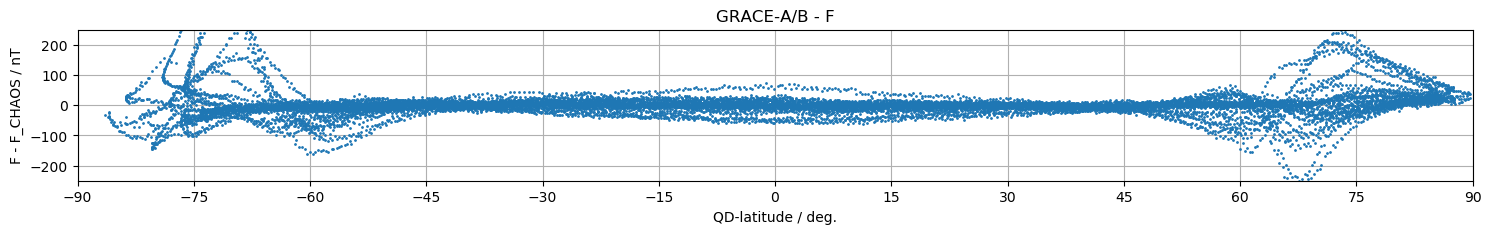

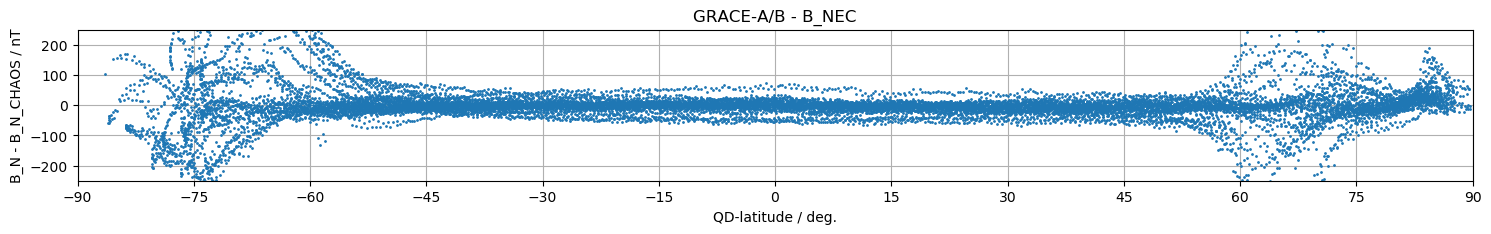

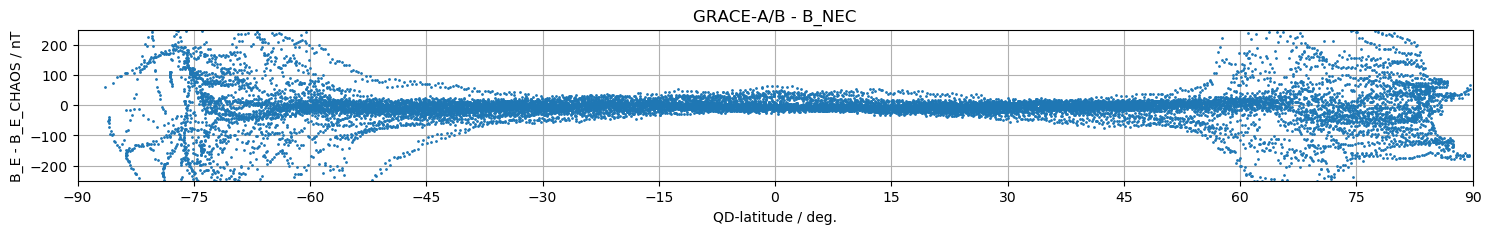

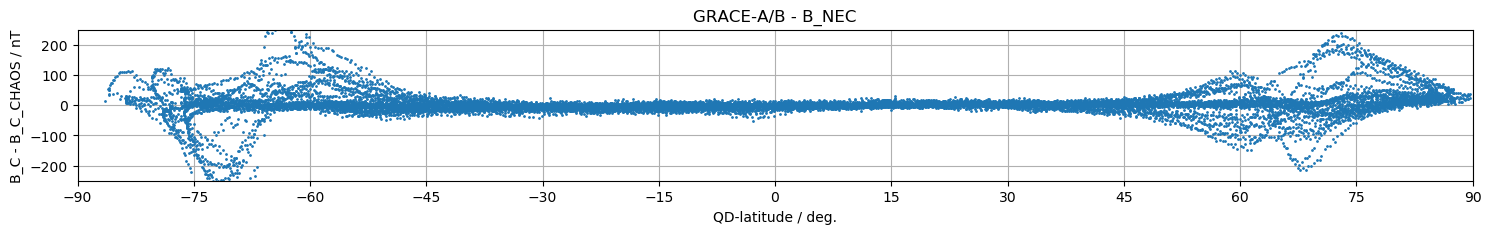

In [6]:
SwarmRequest.COLLECTIONS["MAG_GRACE"] = ["GRACE_A_MAG", "GRACE_B_MAG"]

SwarmRequest.PRODUCT_VARIABLES["MAG_GRACE"] = [
    "F", "B_NEC", "B_NEC_raw", "B_FGM", "B_mod_NEC",
    "q_NEC_CRF", "q_error",
]

request = SwarmRequest(SERVER_URL)
request.set_collection("GRACE_A_MAG", "GRACE_B_MAG") # request data from both A and B
#request.set_collection("GRACE_A_MAG") # request data from A only
#request.set_collection("GRACE_B_MAG") # request data from B only
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_GRACE"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2016-01-01T00:00:00Z",
    end_time="2016-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'GRACE-A/B')

## GRACE FO
avaiable data: 2018-07-01/2018-07-31 and 2019-01-01/2019-01-31

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:12, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (2.799MB)


<xarray.Dataset>
Dimensions:      (B_FGM_dim1: 3, NEC: 3, Timestamp: 8640, dB_BAT_FGM_dim1: 3, dB_BT_FGM_dim1: 3, dB_MTQ_FGM_dim1: 3, dB_NY_FGM_dim1: 3, dB_SA_FGM_dim1: 3, dB_ST_FGM_dim1: 3, dB_XI_FGM_dim1: 3, q_NEC_FGM_dim1: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2019-01-01 ... 2019-01-01T23:59:50
  * NEC          (NEC) <U1 'N' 'E' 'C'
Dimensions without coordinates: B_FGM_dim1, dB_BAT_FGM_dim1, dB_BT_FGM_dim1, dB_MTQ_FGM_dim1, dB_NY_FGM_dim1, dB_SA_FGM_dim1, dB_ST_FGM_dim1, dB_XI_FGM_dim1, q_NEC_FGM_dim1
Data variables:
    Spacecraft   (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    dB_MTQ_FGM   (Timestamp, dB_MTQ_FGM_dim1) float64 11.32 13.15 ... 0.5144
    Latitude     (Timestamp) float64 -26.69 -27.33 -27.96 ... -72.97 -72.34
    B_NEC        (Timestamp, NEC) float64 1.704e+04 -557.4 ... -4.658e+04
    B_FLAG       (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    q_NEC_FGM    (Timestamp, q_NEC_FGM_dim1) float64 0.0006838 

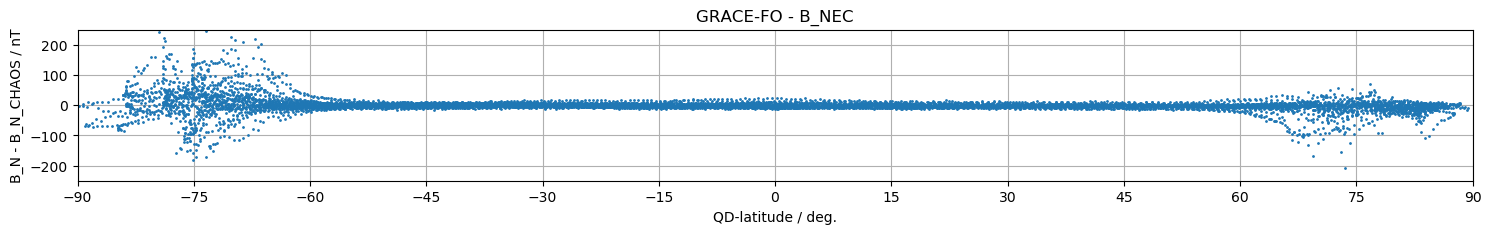

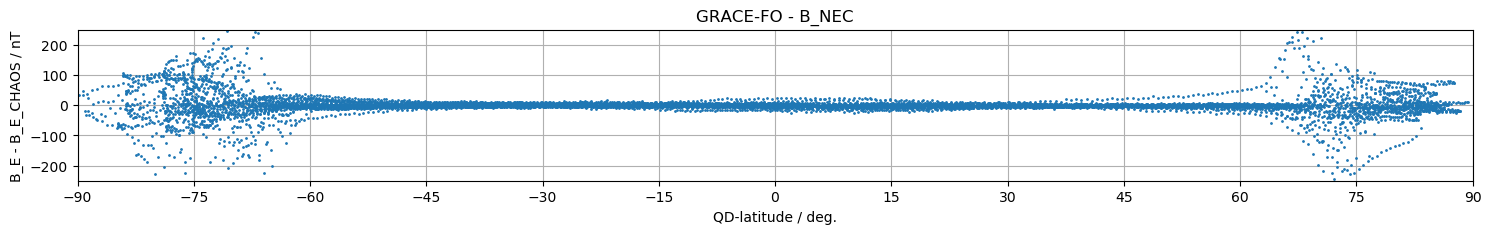

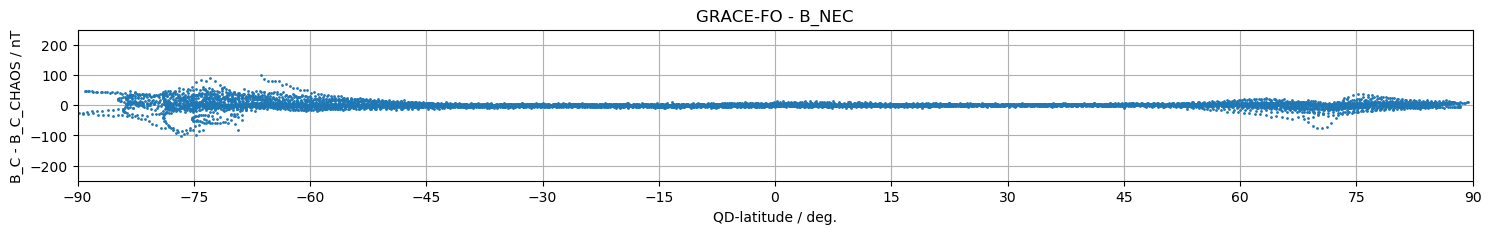

In [7]:

SwarmRequest.COLLECTIONS["MAG_GF1"] = ["GF1_OPER_FGM_ACAL_CORR"]

SwarmRequest.PRODUCT_VARIABLES["MAG_GF1"] = [
    "B_NEC", "B_FGM", "dB_MTQ_FGM", "dB_XI_FGM", "dB_NY_FGM", "dB_BT_FGM",
    "dB_ST_FGM", "dB_SA_FGM", "dB_BAT_FGM", "q_NEC_FGM", "B_FLAG",
]

request = SwarmRequest(SERVER_URL)
request.set_collection("GF1_OPER_FGM_ACAL_CORR")
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_GF1"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'GRACE-FO')

## e-POP (Swarm-E) MAG LR 1Hz - test products
avaiable data: 2016-01-01/2016-01-31, 2018-07-01/2018-07-31 and 2019-01-01/2019-01-31

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:05, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (1.775MB)


<xarray.Dataset>
Dimensions:         (B_inboard_VFM_dim1: 3, B_model_NEC_dim1: 3, B_outboard_VFM_dim1: 3, CalInboard_dim1: 4, CalInboard_dim2: 3, CalOutboard_dim1: 4, CalOutboard_dim2: 3, NEC: 3, Timestamp: 3383, VFM: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2019-01-01T00:00:01 ... 2019-01-01T23:59:51
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_inboard_VFM_dim1, B_model_NEC_dim1, B_outboard_VFM_dim1, CalInboard_dim1, CalInboard_dim2, CalOutboard_dim1, CalOutboard_dim2
Data variables:
    Spacecraft      (Timestamp) object nan nan nan nan nan ... nan nan nan nan
    B_error         (Timestamp, VFM) float64 nan nan nan nan ... nan nan nan nan
    q_NEC_CRF       (Timestamp, quaternion) float64 0.2948 0.0001523 ... 0.9965
    Latitude        (Timestamp) float64 73.72 73.17 72.61 ... -15.54 -16.07
    B_NEC           (Timestamp,

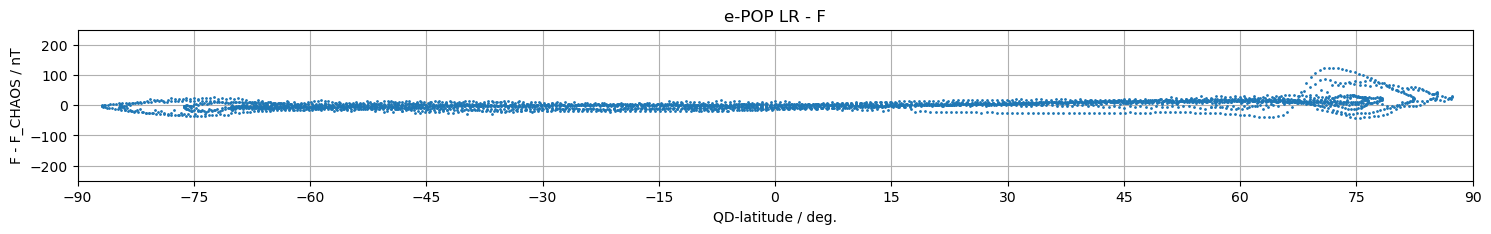

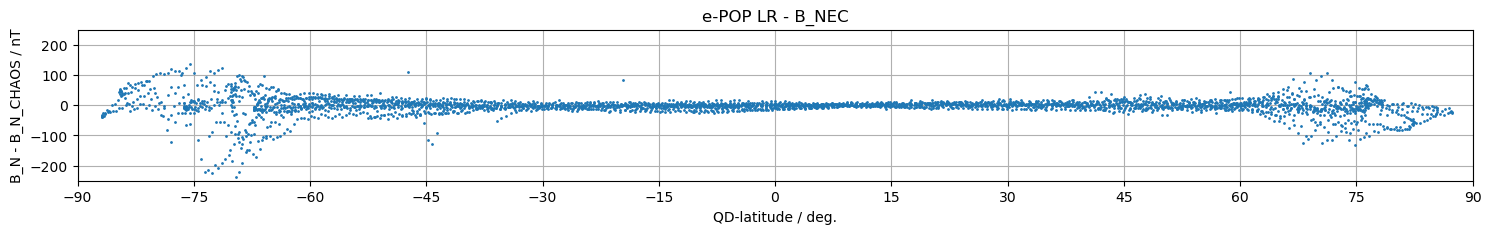

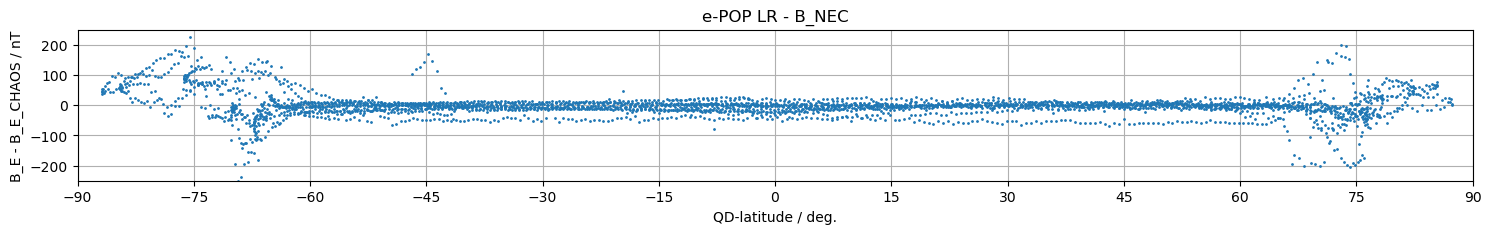

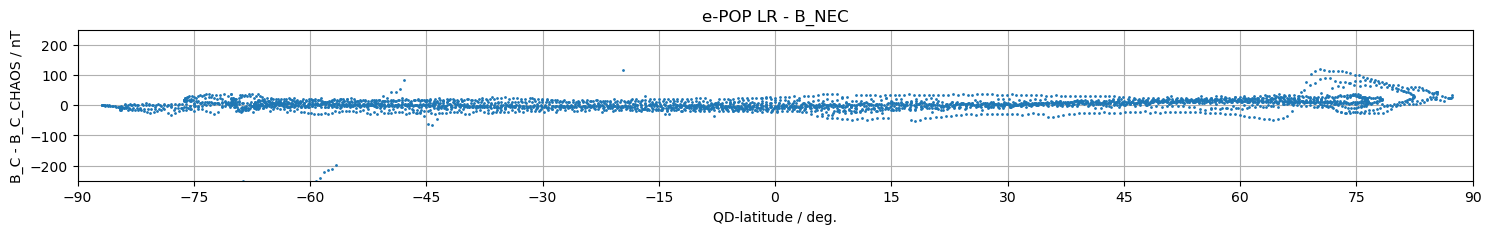

In [8]:

SwarmRequest.COLLECTIONS["MAGE_LR_1B"] = ["SW_TEST_MAGE_LR_1B"]

SwarmRequest.PRODUCT_VARIABLES["MAGE_LR_1B"] = [
    "F", "dF_other", "F_error",
    "B_inboard_VFM", "B_outboard_VFM", "B_VFM", "B_NEC", "B_model_NEC",
    "dB_other", "B_error", "q_NEC_CRF", "Att_error",
    "Flags_F", "Flags_B", "Flags_q", "Flags_Platform", "SyncStatus",
    "CalInboard", "CalOutboard",
]

request = SwarmRequest(SERVER_URL)
request.set_collection("SW_TEST_MAGE_LR_1B")
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAGE_LR_1B"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'e-POP LR')

## e-POP (Swarm-E) MAG HR 166Hz - test products
avaiable data: 2016-01-01/2016-01-31, 2018-07-01/2018-07-31 and 2019-01-01/2019-01-31

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:11, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (1.711MB)


<xarray.Dataset>
Dimensions:         (B_inboard_VFM_dim1: 3, B_model_NEC_dim1: 3, B_outboard_VFM_dim1: 3, CalInboard_dim1: 4, CalInboard_dim2: 3, CalOutboard_dim1: 4, CalOutboard_dim2: 3, NEC: 3, Timestamp: 3383, VFM: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2019-01-01T00:00:00.002413988 ... 2019-01-01T23:59:50.006742239
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_inboard_VFM_dim1, B_model_NEC_dim1, B_outboard_VFM_dim1, CalInboard_dim1, CalInboard_dim2, CalOutboard_dim1, CalOutboard_dim2
Data variables:
    Spacecraft      (Timestamp) object nan nan nan nan nan ... nan nan nan nan
    B_error         (Timestamp, VFM) float64 nan nan nan nan ... nan nan nan nan
    q_NEC_CRF       (Timestamp, quaternion) float64 0.2959 0.0002198 ... -0.9965
    Latitude        (Timestamp) float64 73.77 73.23 72.67 ... -15.48 -16.01
    B_NEC 

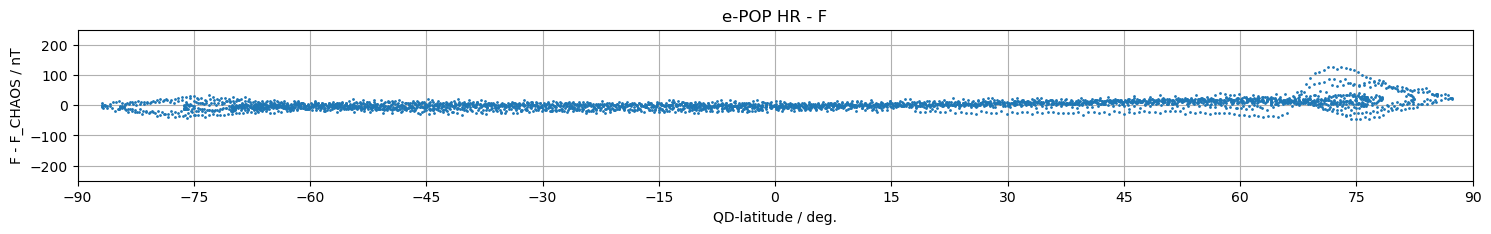

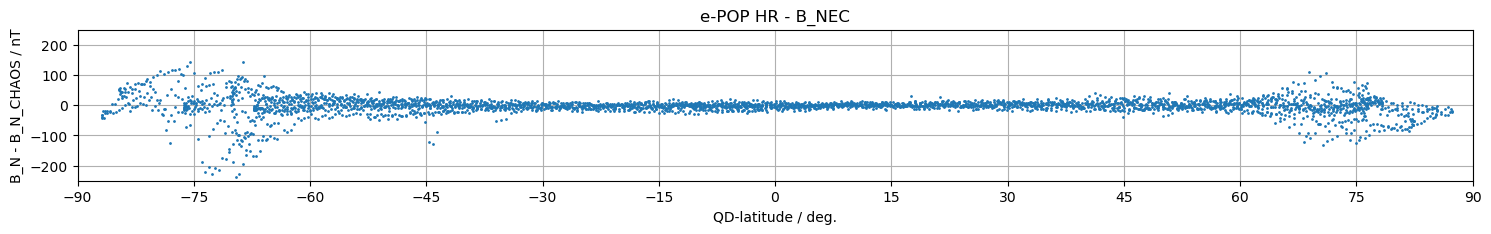

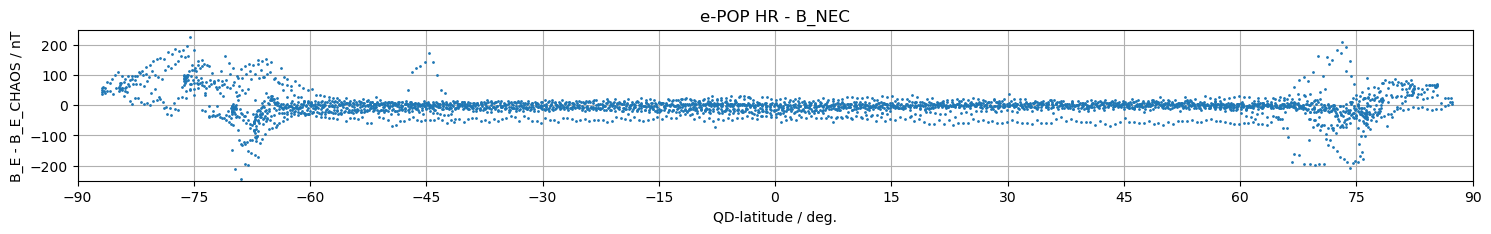

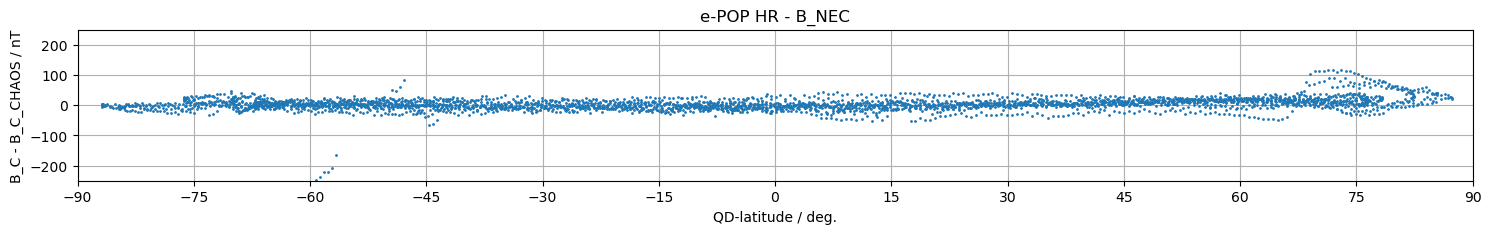

In [9]:
SwarmRequest.COLLECTIONS["MAGE_HR_1B"] = ["SW_TEST_MAGE_HR_1B"]

SwarmRequest.PRODUCT_VARIABLES["MAGE_HR_1B"] = [
    #NOTE: F is calculated on the fly from B_NEC (F = |B_NEC|)
    "F", "B_inboard_VFM", "B_outboard_VFM", "B_VFM", "B_NEC", "B_model_NEC",
    "dB_other", "B_error", "q_NEC_CRF", "Att_error", "Flags_B", "Flags_q",
    "Flags_Platform", "SyncStatus",
    "CalInboard", "CalOutboard",
]

request = SwarmRequest(SERVER_URL)
request.set_collection("SW_TEST_MAGE_HR_1B")
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAGE_HR_1B"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT0.006S", # ~166Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'e-POP HR')

## Swarm-A/B/C MAG LR 1Hz - regular products


[1/1] Processing:  100%|██████████|  [ Elapsed: 00:36, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (8.049MB)


<xarray.Dataset>
Dimensions:         (NEC: 3, Timestamp: 25920, VFM: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2019-01-01 ... 2019-01-01T23:59:50
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Data variables:
    Spacecraft      (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'C' 'C' 'C' 'C'
    B_error         (Timestamp, VFM) float64 0.2295 0.2165 ... 0.2151 0.2776
    dB_AOCS         (Timestamp, VFM) float64 -0.6409 0.3359 ... -0.0907 2.501
    ASM_Freq_Dev    (Timestamp) float64 -1.0 -1.0 0.3 0.3 ... 0.0 0.0 0.0 0.0
    q_NEC_CRF       (Timestamp, quaternion) float64 0.0003257 ... -0.02037
    Latitude        (Timestamp) float64 -17.03 -16.39 -15.75 ... 44.71 44.07
    B_NEC           (Timestamp, NEC) float64 2.368e+04 5.296e+03 ... 3.623e+04
    dB_other        (Timestamp, VFM) float64 0.0378 -0.0188 ... 0.0493 0.0319
    B_NEC_CHAOS     (Timestamp, NEC) float64

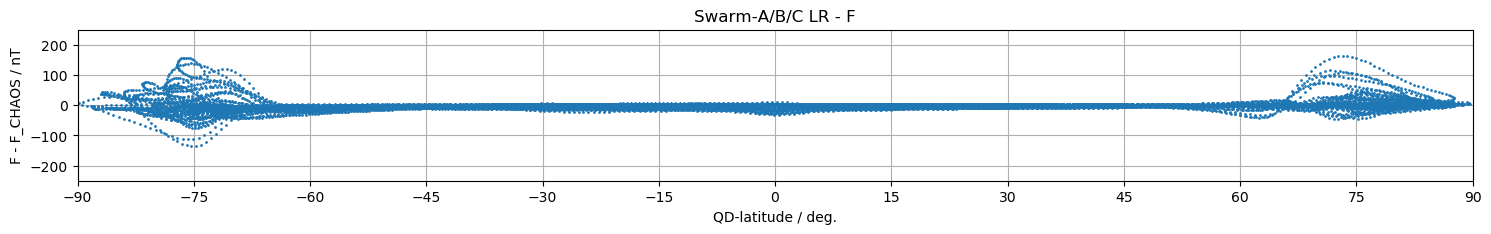

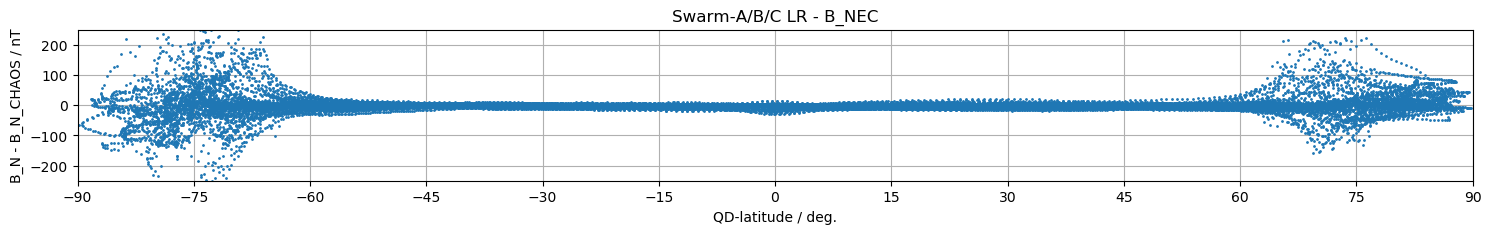

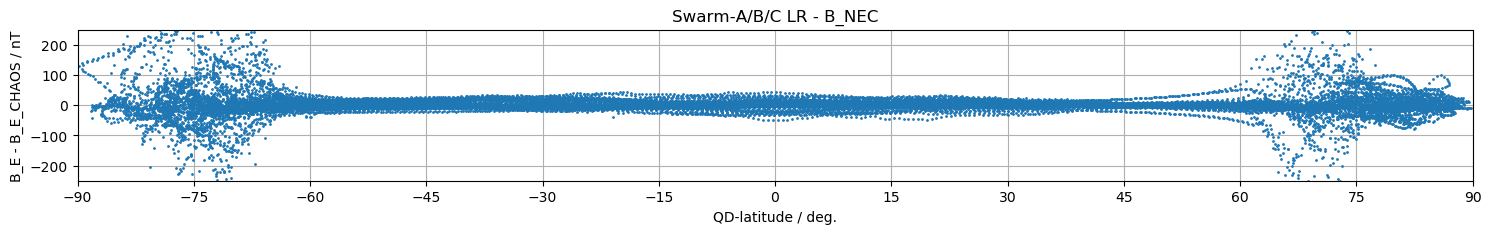

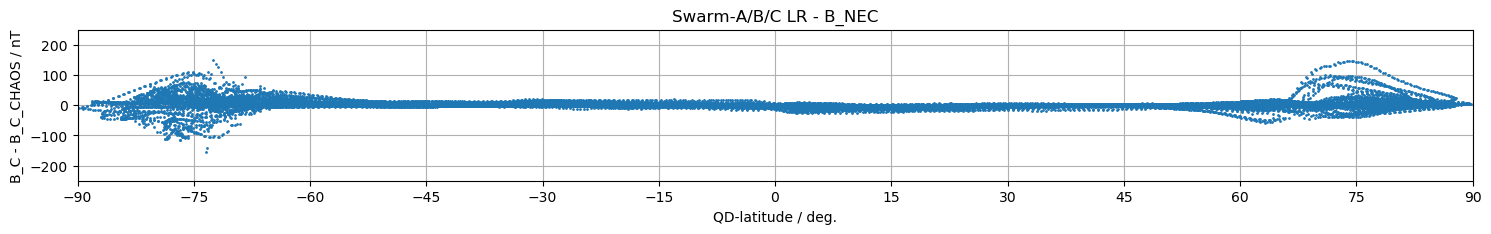

In [10]:
request = SwarmRequest(SERVER_URL)
request.set_collection(*SwarmRequest.COLLECTIONS["MAG"])
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'Swarm-A/B/C LR')

## Swarm-A/B/C MAG HR 1Hz - regular products


[1/1] Processing:  100%|██████████|  [ Elapsed: 00:47, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (7.191MB)


<xarray.Dataset>
Dimensions:         (NEC: 3, Timestamp: 25920, VFM: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2019-01-01T00:00:00.010499954 ... 2019-01-01T23:59:50.009031296
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Data variables:
    Spacecraft      (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'C' 'C' 'C' 'C'
    B_error         (Timestamp, VFM) float64 0.2293 0.2163 ... 0.2151 0.2774
    dB_AOCS         (Timestamp, VFM) float64 -0.6409 0.3359 ... -0.0907 2.501
    q_NEC_CRF       (Timestamp, quaternion) float64 0.0003257 ... 0.02037
    Latitude        (Timestamp) float64 -17.03 -16.39 -15.74 ... 44.71 44.07
    B_NEC           (Timestamp, NEC) float64 2.368e+04 5.296e+03 ... 3.623e+04
    dB_other        (Timestamp, VFM) float64 0.0378 -0.0188 ... 0.0493 0.0319
    B_NEC_CHAOS     (Timestamp, NEC) float64 2.368e+04 5.318e+03 ... 3.623e+04
    Flags_B    

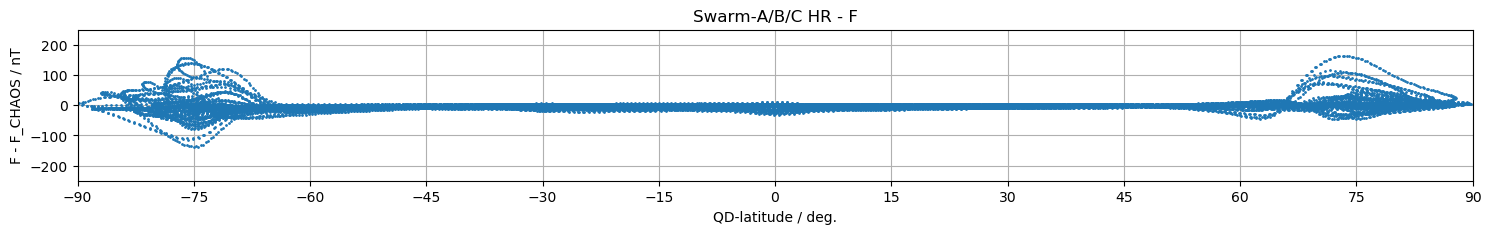

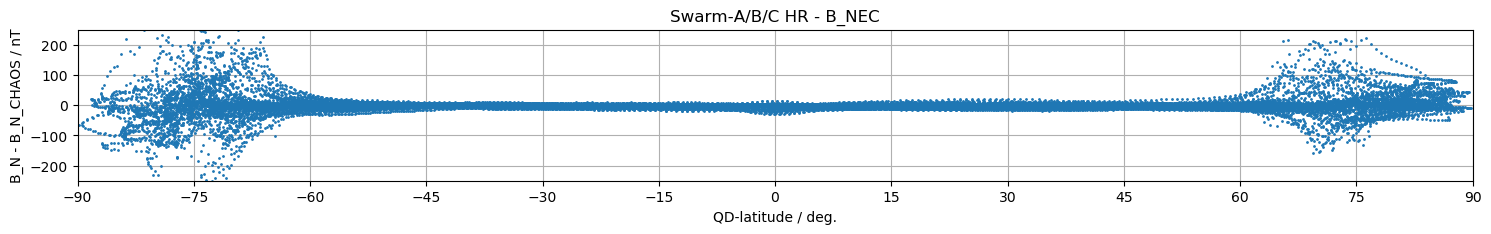

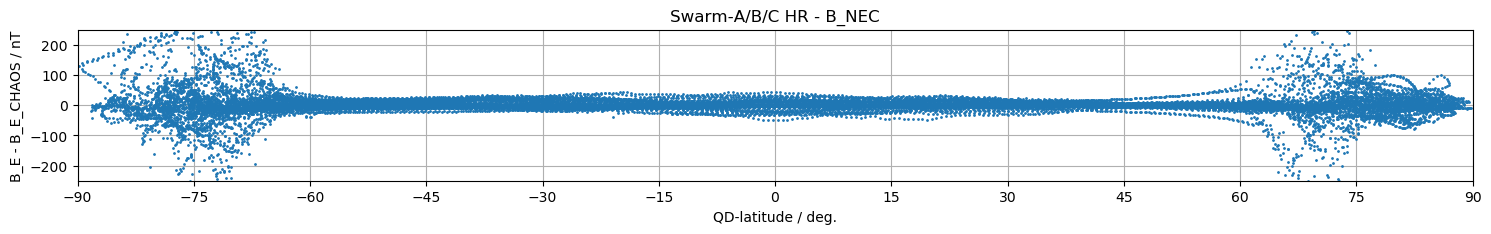

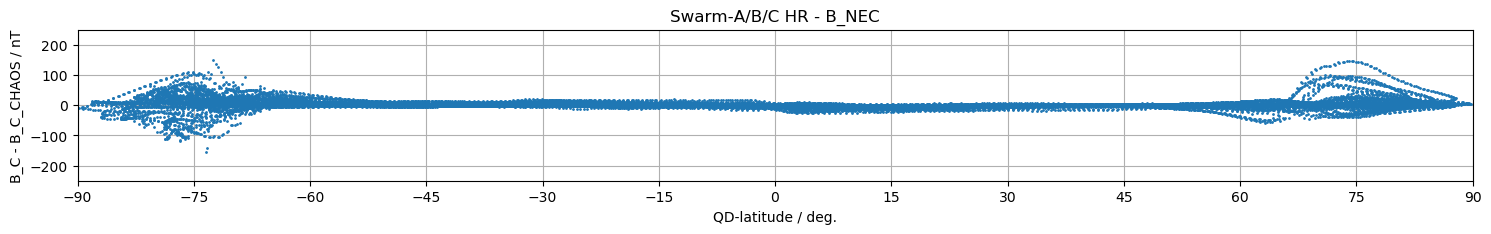

In [11]:
request = SwarmRequest(SERVER_URL)
request.set_collection(*SwarmRequest.COLLECTIONS["MAG_HR"])
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_HR"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT0.02S", # ~50Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'Swarm-A/B/C HR')